In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Getting the file path
DATA_PATH = '/Users/TygaBRii/Downloads/ML/'
file_transc = DATA_PATH+'train_transaction.csv'
file_idn = DATA_PATH+'train_identity.csv'
print(file_transc,'\n', file_idn)

/Users/TygaBRii/Downloads/ML/train_transaction.csv 
 /Users/TygaBRii/Downloads/ML/train_identity.csv


In [24]:
#TRANSACTION TABLE
train_txn = pd.read_csv(file_transc)
print(train_txn.shape)


(590540, 394)


In [25]:
#IDENTITY TABLE
train_idn = pd.read_csv(file_idn)
print(train_idn.shape)


(144233, 41)


In [5]:
def get_nan_dic(df):
    """
    get NaN dictionary
    return: a dictionary with #of null values as key and feature names as value
    """
    nulls = df.isna()
    nan_dic = {}
    for f in df.columns:
        c=nulls[f].sum()
        nan_dic[c]=[]
    for f in df.columns:
        c = nulls[f].sum()
        nan_dic[c].append(f)
    return nan_dic

In [6]:
nan_dic = get_nan_dic(train_txn)

In [7]:
print(nan_dic)

{0: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14'], 8933: ['card2'], 1565: ['card3'], 1577: ['card4'], 4259: ['card5'], 1571: ['card6'], 65706: ['addr1', 'addr2'], 352271: ['dist1'], 552913: ['dist2'], 94456: ['P_emaildomain'], 453249: ['R_emaildomain'], 1269: ['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315'], 280797: ['D2'], 262878: ['D3'], 168922: ['D4'], 309841: ['D5'], 517353: ['D6'], 551623: ['D7'], 515614: ['D8', 'D9'], 76022: ['D10'], 279287: ['D11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'], 525823: ['D12'], 528588: ['D13'], 528353: ['D14'], 89113: ['D15'], 271100: ['M1', 'M2', 'M3'], 281444: ['M4'], 350482: ['M5'], 169360: ['M6'], 346265: ['M7'], 346252: ['M8', 'M9'], 76073: ['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V

In [8]:
for key, value in nan_dic.items() :
    print(key)

0
8933
1565
1577
4259
1571
65706
352271
552913
94456
453249
1269
280797
262878
168922
309841
517353
551623
515614
76022
279287
525823
528588
528353
89113
271100
281444
350482
169360
346265
346252
76073
168969
77096
89164
314
508595
508589
450909
450721
460110
449124
12
508189


In [9]:
#To plot correlation matrix as heatmap
def plot_corr(df,cols):
    fig = plt.figure(figsize=(12,8))
    sns.heatmap(df[cols].corr(),cmap='RdBu_r', annot=True, center=0.0)
    plt.show() 

In [10]:
Vs = nan_dic[279287]
Vs


['D11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']

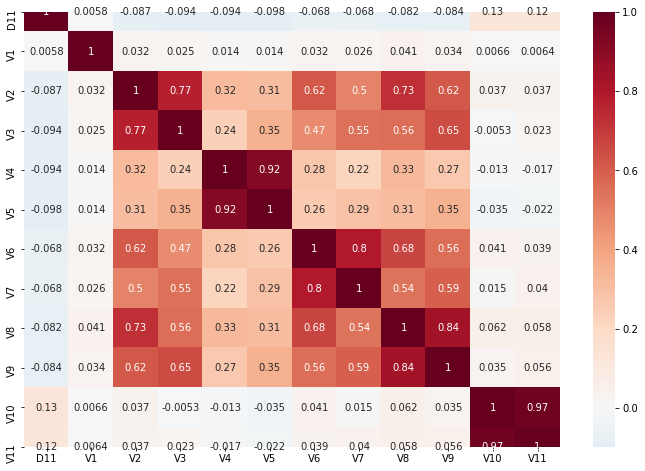

In [11]:
plot_corr(train_txn,Vs)

In [12]:
Vs = nan_dic[525823] + nan_dic[528588] + nan_dic[528353] + nan_dic[89113] 
Vs    

['D12', 'D13', 'D14', 'D15']

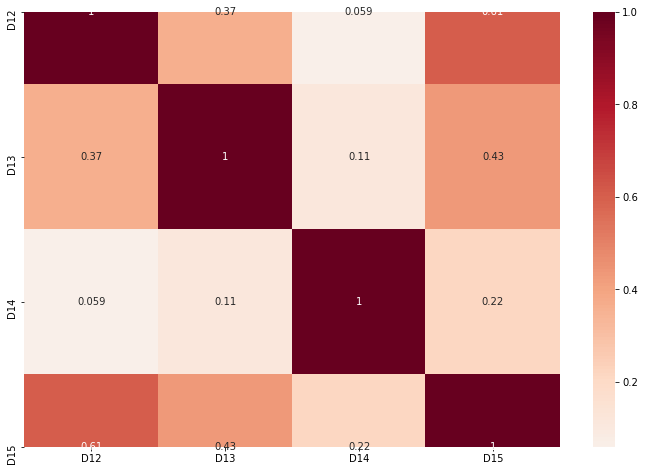

In [13]:
plot_corr(train_txn,Vs)

Columns M1 to M7 are object type column and cannot be plotted using the heatmap or using direct correlation

nan_dic[271100, 281444, 350482, 169360, 346265]

The object categories have to be converted to numerical values

In [14]:
##Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
def transfer_cat_2_int(train_df):
    print("Start transfer categorical values to integer ...")
    category_columns = train_df.select_dtypes(include=['category', object]).columns
    for f in category_columns:
        train_df[f] = train_df[f].astype(str)
        le = LabelEncoder()
        train_df[f] = le.fit_transform(train_df[f])

In [17]:
transfer_cat_2_int(train_txn)

Start transfer categorical values to integer ...


In [18]:
Vs = nan_dic[271100] + nan_dic[281444] + nan_dic[350482] + nan_dic[169360] + nan_dic[346265]
Vs

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7']

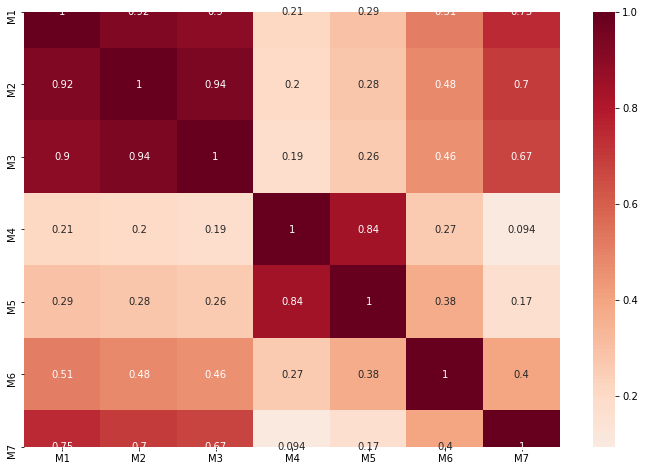

In [19]:
plot_corr(train_txn,Vs)

In [22]:
for column in train_txn.columns:
    corr = train_txn['isFraud'].corr(train_txn[column])
    print(column, corr)

TransactionID 0.014165772702318346
isFraud 1.0
TransactionDT 0.013103054993050102
TransactionAmt 0.011319825333215114
ProductCD -0.15655631946488938
card1 -0.013639969873036532
card2 0.00338787917827069
card3 0.15415133308432816
card4 -0.003297580284695842
card5 -0.03357955581230888
card6 -0.09776012890324368
addr1 0.005595762757557442
addr2 -0.030387147315389045
dist1 0.021522161350320996
dist2 -0.019053623292596276
P_emaildomain -0.024056029210028647
R_emaildomain -0.08575999063419688
C1 0.030569759651240487
C2 0.03722893953099915
C3 -0.0068331738266534485
C4 0.030382136305078175
C5 -0.030753966713252524
C6 0.020908983553784347
C7 0.028160291640635673
C8 0.032138713158292614
C9 -0.03170341586419452
C10 0.028395987456790495
C11 0.027483734598875872
C12 0.03190528171122539
C13 -0.011145752229048518
C14 0.007920558690608027
D1 -0.06719305903571009
D2 -0.08358321970827125
D3 -0.04627138134885123
D4 -0.0672163025595118
D5 -0.06463762954147721
D6 -0.05723557903343871
D7 -0.1271985070819650

CONCLUSION :
I compared them against each other and also our target to find out which one should be dropped.

For the Vs :
Corr    - Keep - Drop
V2 & V3 -  V3  - V2
V4 & V5 -  V5  - V4
V6 & V7 -  V7  - V6
V8 & V9 -  V9  - V8
V10& V11-  V10 - V11

For the Ds :
None of them have a high correlation so it would be safe to keep them all.

For the Ms:
Correlated  - Keep
M1, M2 & M3 - M1 **More correlated to isFraud column
M4 & M5     - M4
M1 & M7     - M1 **already keeping M1


